In [1]:
# import python libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import csv file
dataframe = pd.read_csv("titanic.csv", encoding= "unicode_escape")

# make a copy of original dataframe
df = dataframe.copy()

In [3]:
df.shape

(891, 12)

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Data Processing

In [7]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
# standardise column headers
df.columns = df.columns.str.strip().str.lower().str.split().str.join(" ").str.replace(" ","_")

In [9]:
df.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')

In [10]:
# check for null values
df.isnull().sum()

passengerid      0
survived         0
pclass           0
name             0
sex              0
age            177
sibsp            0
parch            0
ticket           0
fare             0
cabin          687
embarked         2
dtype: int64

In [11]:
# drop records with null values in embarked column
df.dropna(subset="embarked",inplace=True)

In [12]:
# drop unnecessary column
df.drop(columns=["ticket","cabin"], inplace=True)

In [13]:
# remove extra spaces from column values
clean_columns = list(df.columns)

# create loops for cleaning extra spaces from each columns
for i in clean_columns:
    if df[i].dtype == "object": # handle non-str columns
        df[i] = df[i].str.strip()

In [14]:
# create survial_status column
df.insert(2, "survival_status", np.where(df["survived"]==0,"Not Survived","Survived"))

In [15]:
# create class column
df.insert(4, "class", np.where(df["pclass"]==1,"First",np.where(df["pclass"]==2,"Second","Third")))

In [16]:
# uppercase sex column value
df["sex"] = df["sex"].str.capitalize()

In [17]:
# fill Null values of age column with 0
df["age"] = df["age"].fillna(0)

In [18]:
# change dtype of age column from float to int
df["age"] = df["age"].astype(int)

In [19]:
# count records with 0 as age
count=0
for i in df.index:
    if df.loc[i,"age"]==0:
        count+=1
print("Total count is:",count)

Total count is: 184


In [20]:
# fill the records with 0 as age with last valid observation
df["age"] = df["age"].replace(0, pd.NA).ffill()

In [21]:
# create a new column "age_class"

bins = [1, 13, 20, 27, 36, 61, 90]
labels = ["Children", "Teenagers", "Young adults", "Adults", "Middle-aged", "Seniors"]

df.insert(8, "age_class", pd.cut(df["age"], bins=bins, labels=labels))

In [22]:
# create a new column "embarked_port"
df["embarked_from"] = np.where(df["embarked"]=="S","Southampton",np.where(df["embarked"]=="C","Cherbourg","Queenstown"))

In [23]:
df.head()

,passengerid,survived,survival_status,pclass,class,name,sex,age,age_class,sibsp,parch,fare,embarked,embarked_from
0,1,0,Not Survived,3,Third,"Braund, Mr. Owen Harris",Male,22,Young adults,1,0,7.2500,S,Southampton
1,2,1,Survived,1,First,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Female,38,Middle-aged,1,0,71.2833,C,Cherbourg
2,3,1,Survived,3,Third,"Heikkinen, Miss. Laina",Female,26,Young adults,0,0,7.9250,S,Southampton
3,4,1,Survived,1,First,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Female,35,Adults,1,0,53.1000,S,Southampton
4,5,0,Not Survived,3,Third,"Allen, Mr. William Henry",Male,35,Adults,0,0,8.0500,S,Southampton


## Data Analysis & Visualisation

In [24]:
survived_passengers = df[df["survived"] == 1]

In [25]:
not_survived_passengers = df[df["survived"] == 0]

In [26]:
# set default figure size and font sizes for titles, xlabels, and ylabels

sns.set(rc={'figure.figsize': (20, 6),
            'axes.titlesize': 18,     # Title font size
            'axes.labelsize': 14,     # X and Y label font size
            'xtick.labelsize': 12,    # X tick label font size
            'ytick.labelsize': 12})   # Y tick label font size

### Distribution in Passenger Class

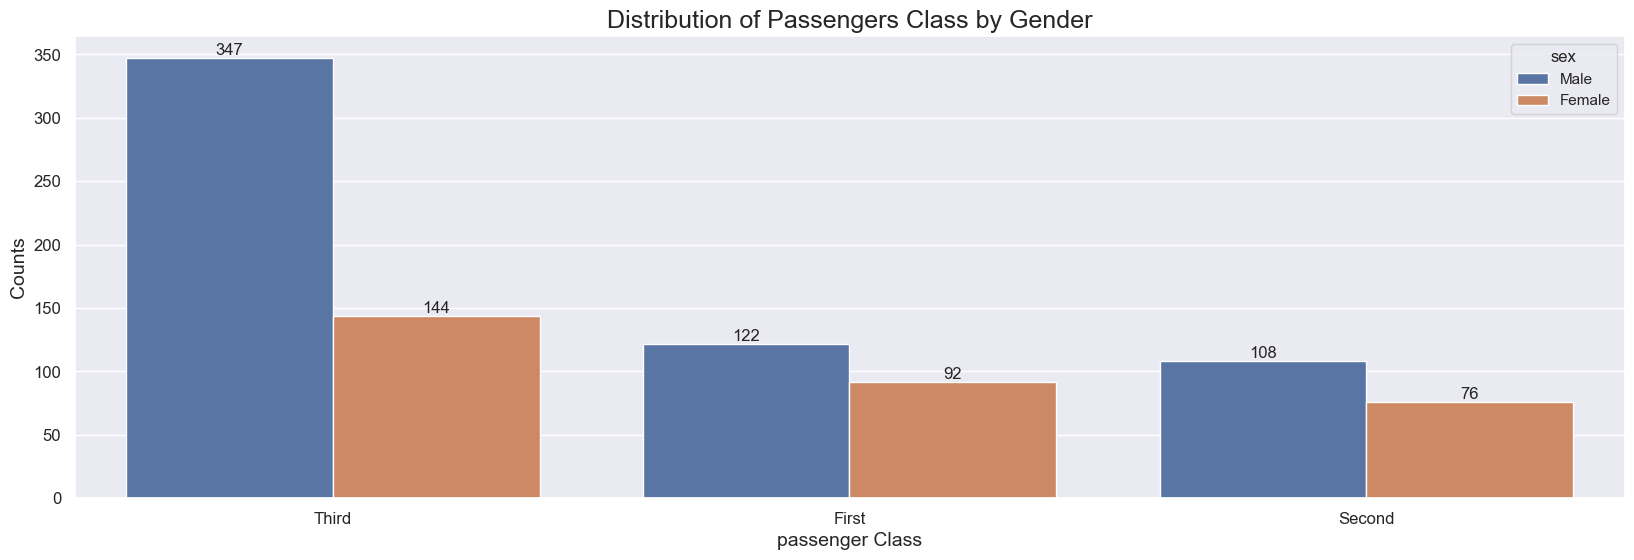

In [27]:
axs1 = sns.countplot(data = df, x = "class", hue="sex")

for i in axs1.containers:
    axs1.bar_label(i, fontsize=12)
    
plt.xlabel("passenger Class")
plt.ylabel("Counts")
plt.title("Distribution of Passengers Class by Gender")

plt.show()

### Survival Status of Titanic Passengers

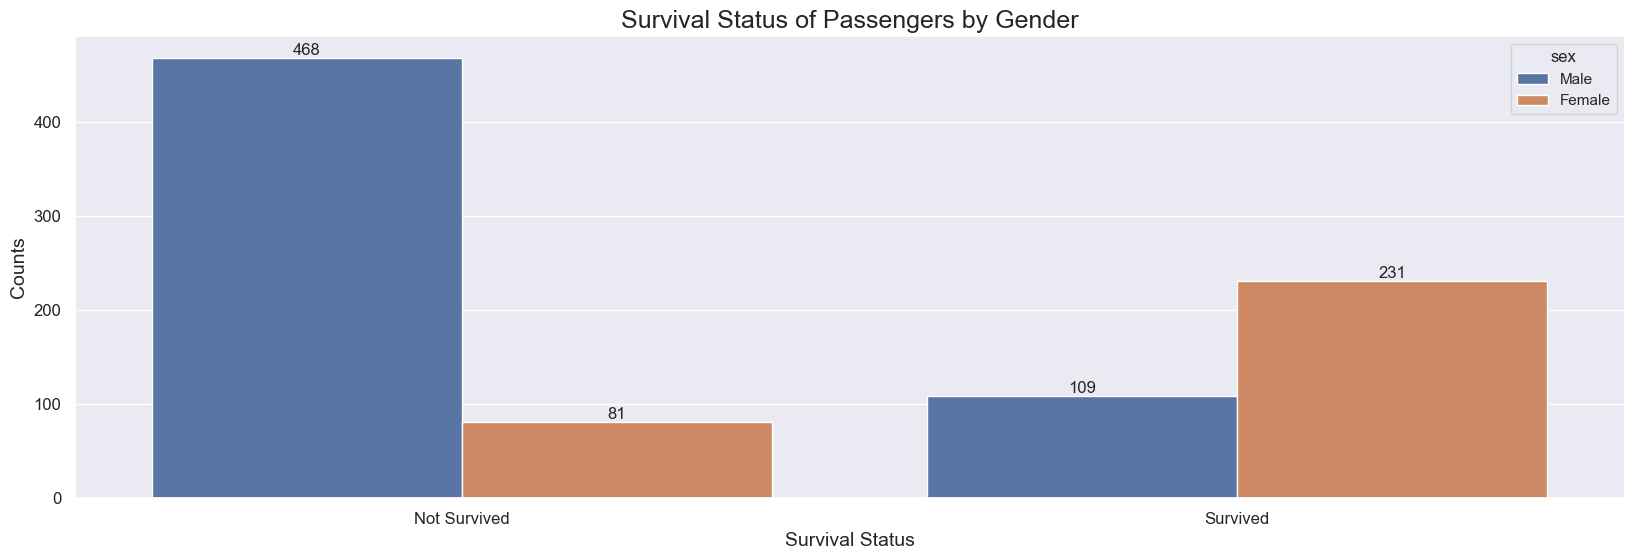

In [28]:
axs2 = sns.countplot(data = df, x = "survival_status", hue="sex")

for i in axs2.containers:
    axs2.bar_label(i, fontsize=12)
    
plt.xlabel("Survival Status")
plt.ylabel("Counts")
plt.title("Survival Status of Passengers by Gender")

plt.show()

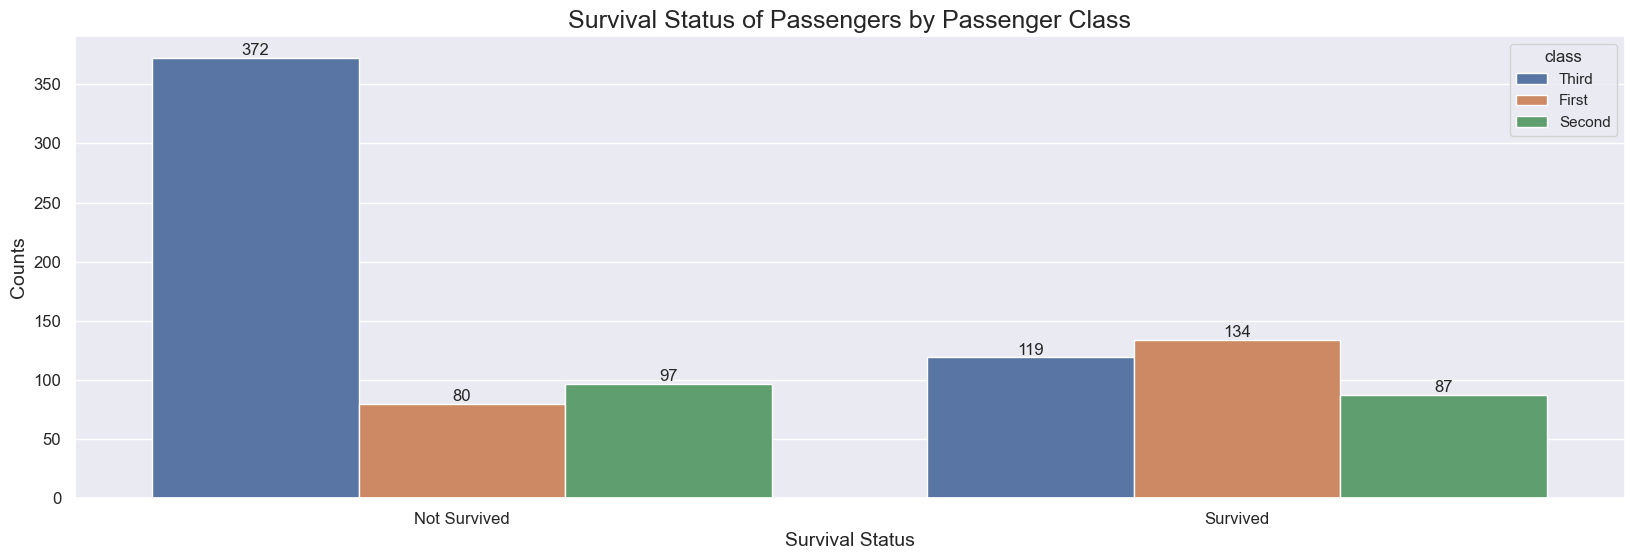

In [29]:
axs3 = sns.countplot(data = df, x = "survival_status", hue="class")

for i in axs3.containers:
    axs3.bar_label(i, fontsize=12)
    
plt.xlabel("Survival Status")
plt.ylabel("Counts")
plt.title("Survival Status of Passengers by Passenger Class")

plt.show()

### Distribution of Survived Passengers Class

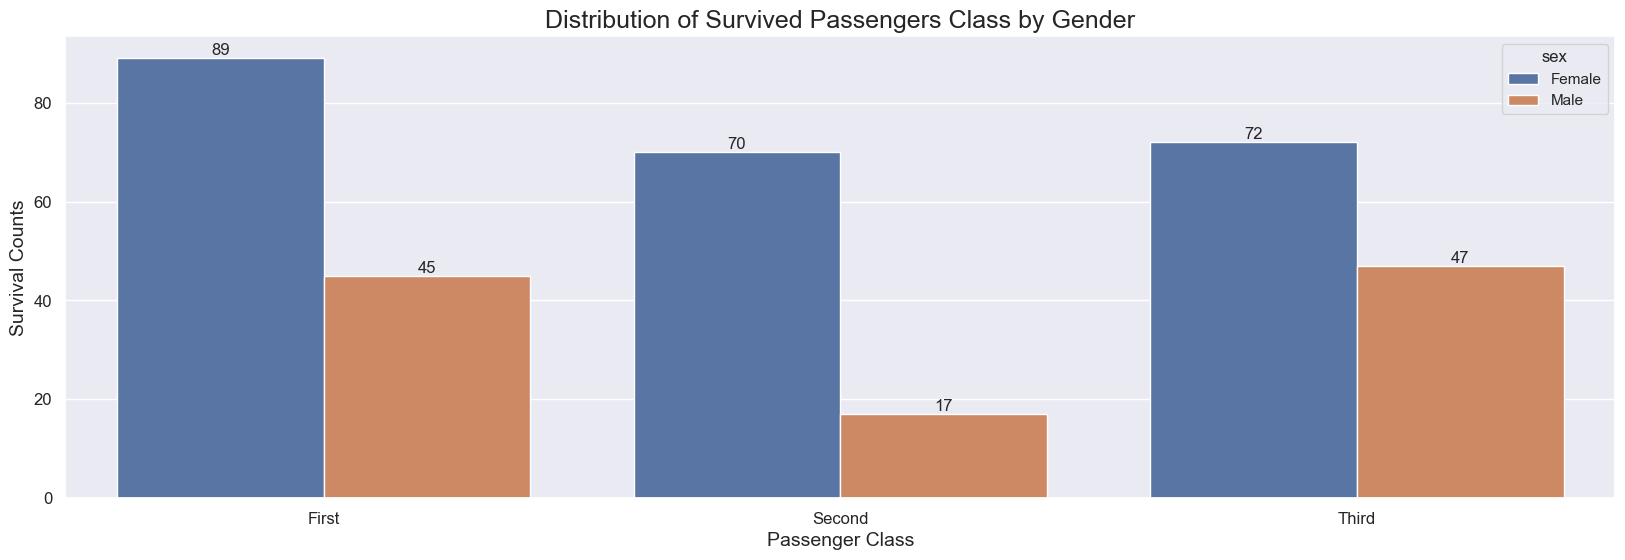

In [30]:
axs4 = sns.countplot(data = survived_passengers, x = "class", hue="sex", order=["First","Second","Third"])

for i in axs4.containers:
    axs4.bar_label(i, fontsize=12)
    
plt.xlabel("Passenger Class")
plt.ylabel("Survival Counts")
plt.title("Distribution of Survived Passengers Class by Gender")

plt.show()

### Distribution of Not survived Passengers Class

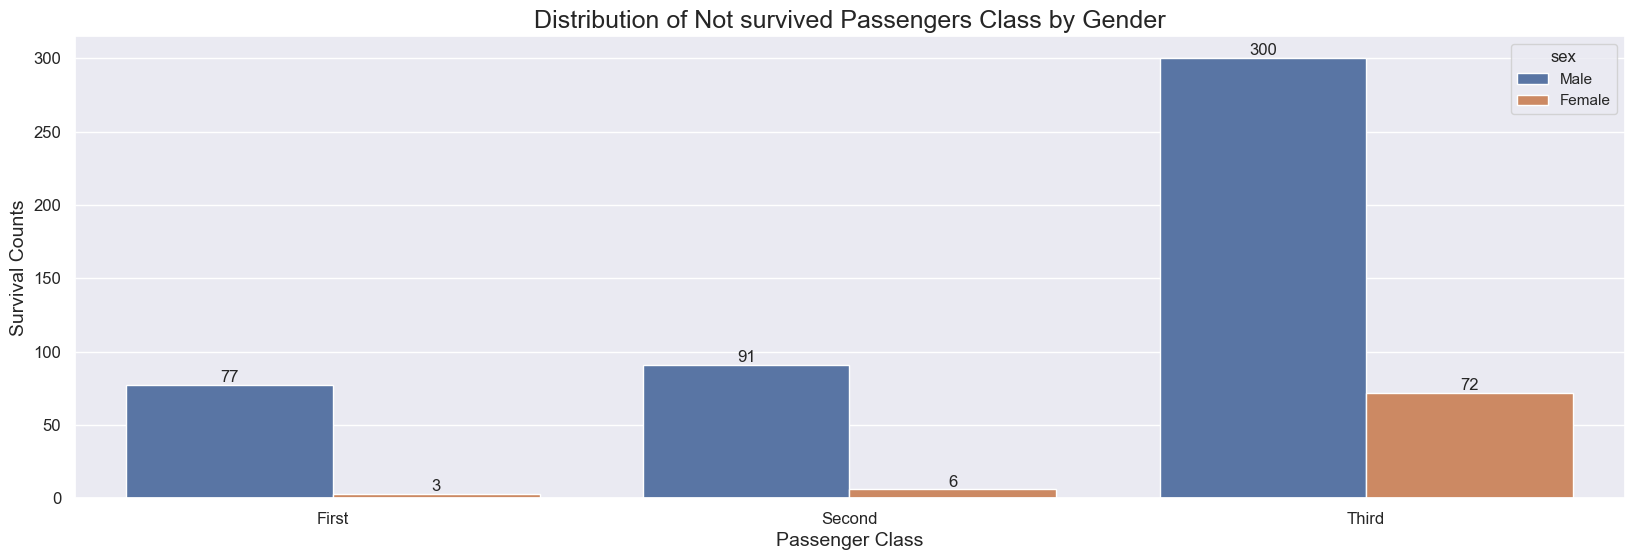

In [31]:
axs5 = sns.countplot(data = not_survived_passengers, x = "class", hue="sex", order=["First","Second","Third"])

for i in axs5.containers:
    axs5.bar_label(i, fontsize=12)
    
plt.xlabel("Passenger Class")
plt.ylabel("Survival Counts")
plt.title("Distribution of Not survived Passengers Class by Gender")

plt.show()

### Age Distribution of Titanic Passengers

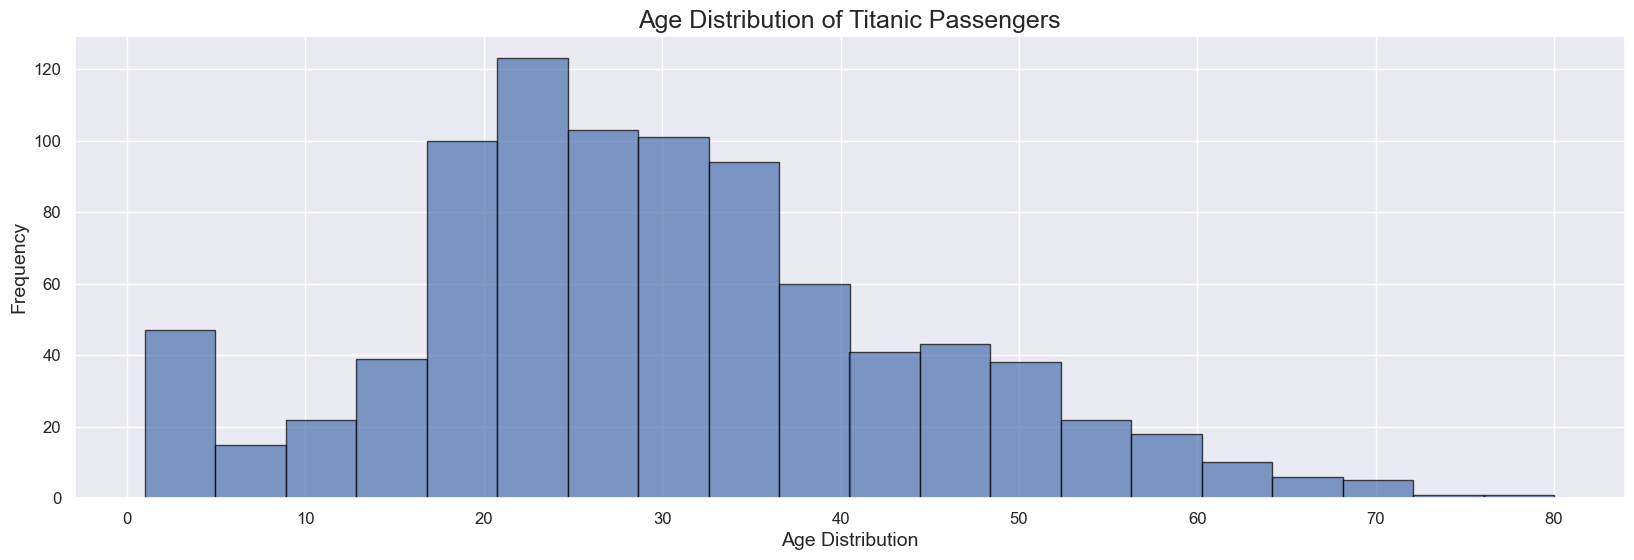

In [32]:
plt.hist(data=df, x='age',  bins=20, edgecolor='black', alpha=0.7)
plt.title('Age Distribution of Titanic Passengers')
plt.xlabel('Age Distribution')
plt.ylabel('Frequency')
plt.show()

### Age Distribution of Survived Titanic Passengers

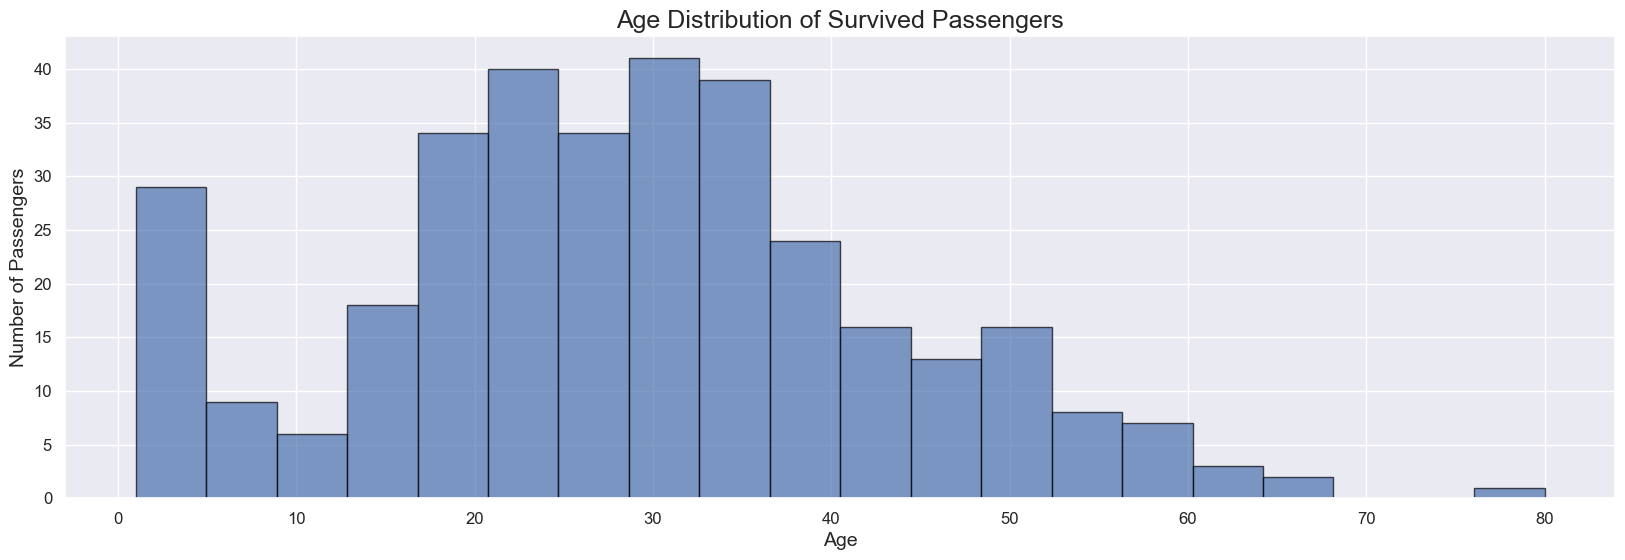

In [33]:
plt.hist(survived_passengers["age"], bins=20, edgecolor="black", alpha=0.7)
plt.xlabel("Age")
plt.ylabel("Number of Passengers")
plt.title("Age Distribution of Survived Passengers")
plt.grid(True)
plt.show()

### Age Distribution of Not survived Titanic Passengers

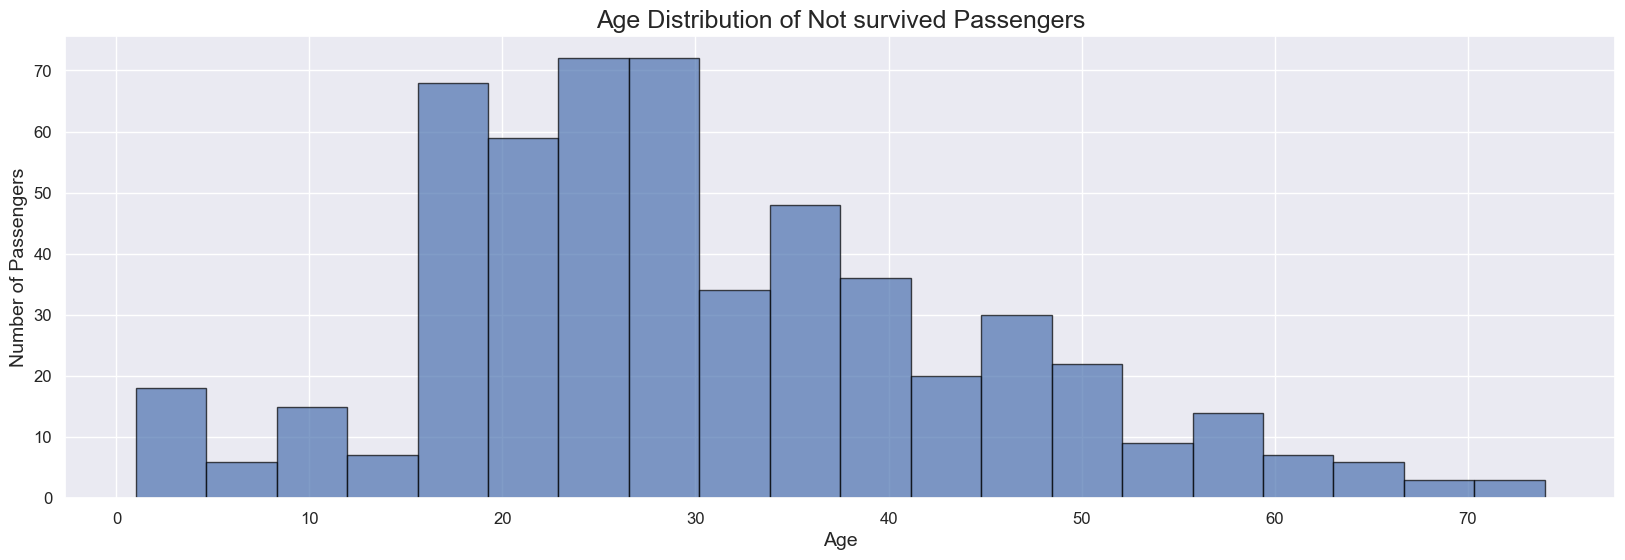

In [34]:
plt.hist(not_survived_passengers["age"], bins=20, edgecolor="black", alpha=0.7)
plt.xlabel("Age")
plt.ylabel("Number of Passengers")
plt.title("Age Distribution of Not survived Passengers")
plt.grid(True)
plt.show()

### Age Group of Survived Passenger Class

In [35]:
df["age_class"].unique()

['Young adults', 'Middle-aged', 'Adults', 'Children', 'Teenagers', 'Seniors', NaN]
Categories (6, object): ['Children' < 'Teenagers' < 'Young adults' < 'Adults' < 'Middle-aged' < 'Seniors']

C:\Users\imbag\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\imbag\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


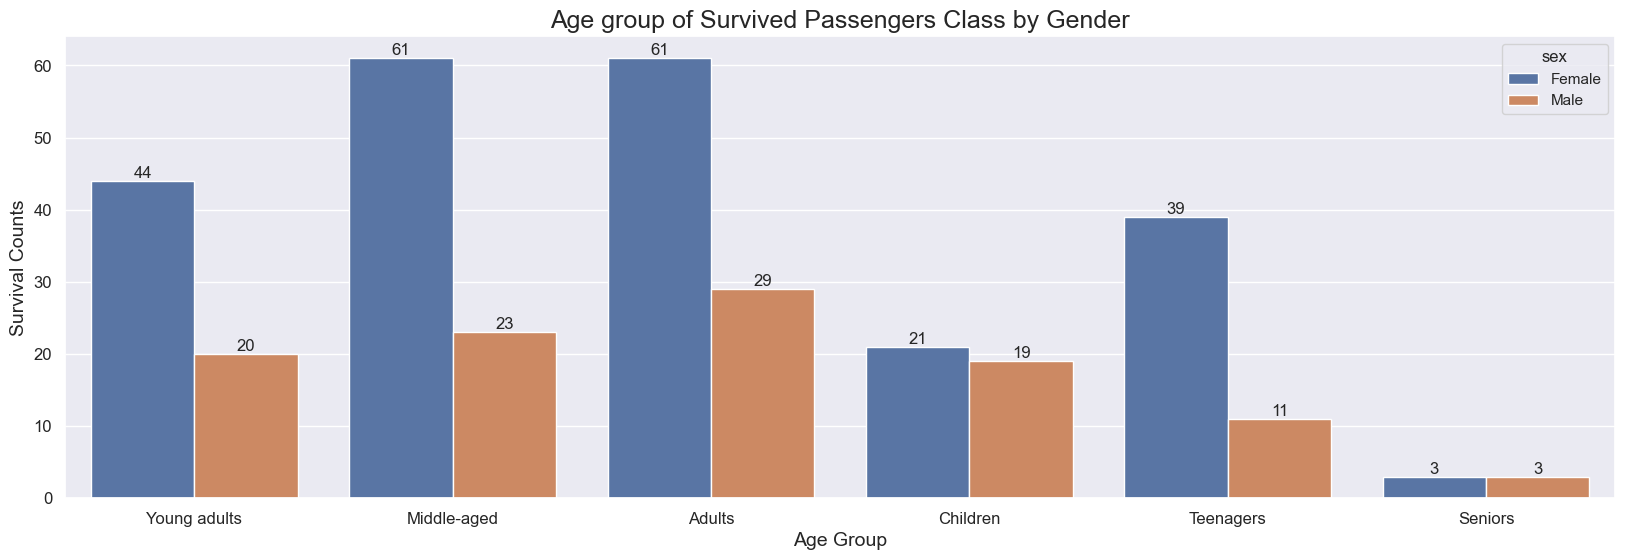

In [36]:
orders = ['Young adults', 'Middle-aged', 'Adults', 'Children', 'Teenagers', 'Seniors']
axs6 = sns.countplot(data = survived_passengers, x = "age_class", hue="sex", order=orders)

for i in axs6.containers:
    axs6.bar_label(i, fontsize=12)
    
plt.xlabel("Age Group")
plt.ylabel("Survival Counts")
plt.title("Age group of Survived Passengers Class by Gender")

plt.show()

### Age Group of Not survived Passenger Class

C:\Users\imbag\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\imbag\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


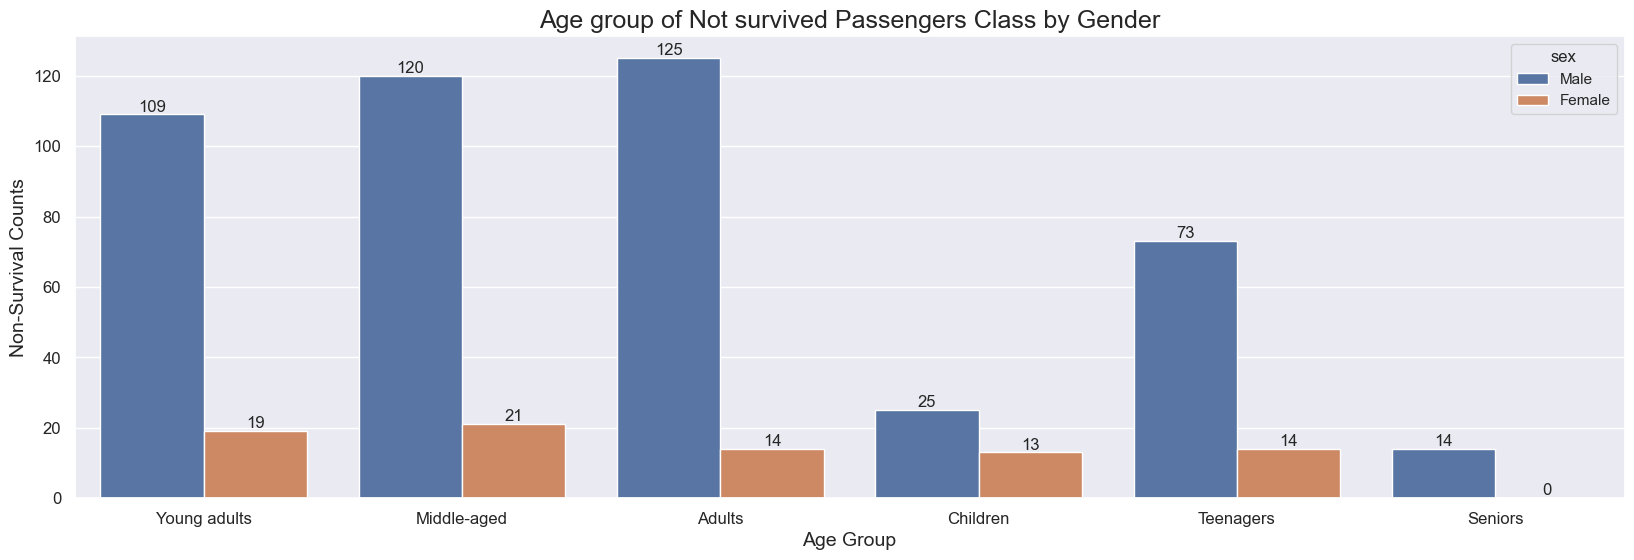

In [37]:
orders = ['Young adults', 'Middle-aged', 'Adults', 'Children', 'Teenagers', 'Seniors']
axs7 = sns.countplot(data = not_survived_passengers, x = "age_class", hue="sex", order=orders)

for i in axs7.containers:
    axs7.bar_label(i, fontsize=12)
    
plt.xlabel("Age Group")
plt.ylabel("Non-Survival Counts")
plt.title("Age group of Not survived Passengers Class by Gender")

plt.show()

In [38]:
df["embarked_from"].unique()

array(['Southampton', 'Cherbourg', 'Queenstown'], dtype=object)

In [39]:
orders = ['Southampton', 'Cherbourg', 'Queenstown']

### Passengers Distribution by Port

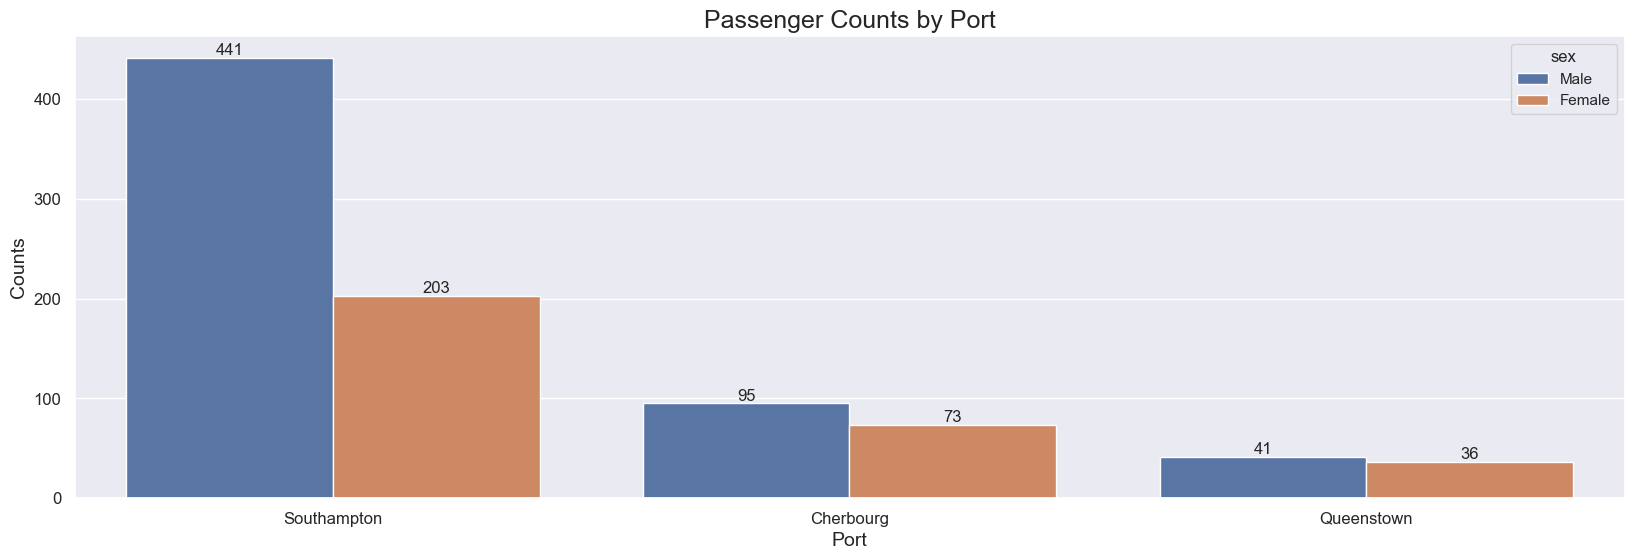

In [40]:
axs8 = sns.countplot(data = df, x = "embarked_from", hue="sex", order=orders)

for i in axs8.containers:
    axs8.bar_label(i, fontsize=12)
    
plt.xlabel("Port")
plt.ylabel("Counts")
plt.title("Passenger Counts by Port")

plt.show()

### Survived Passengers Distribution by Port

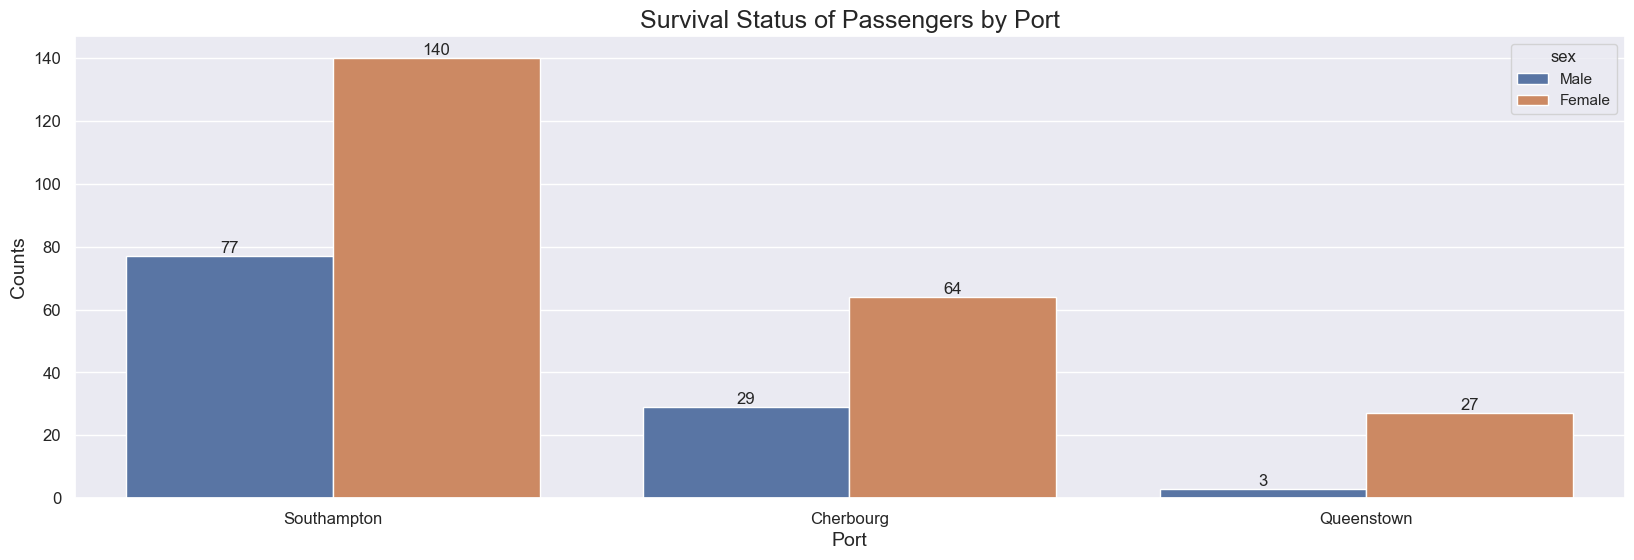

In [41]:
axs9 = sns.countplot(data = survived_passengers, x = "embarked_from", hue="sex", hue_order=["Male","Female"], order=orders)

for i in axs9.containers:
    axs9.bar_label(i, fontsize=12)
    
plt.xlabel("Port")
plt.ylabel("Counts")
plt.title("Survival Status of Passengers by Port")

plt.show()

### Non-Survived Passengers Distribution by Port

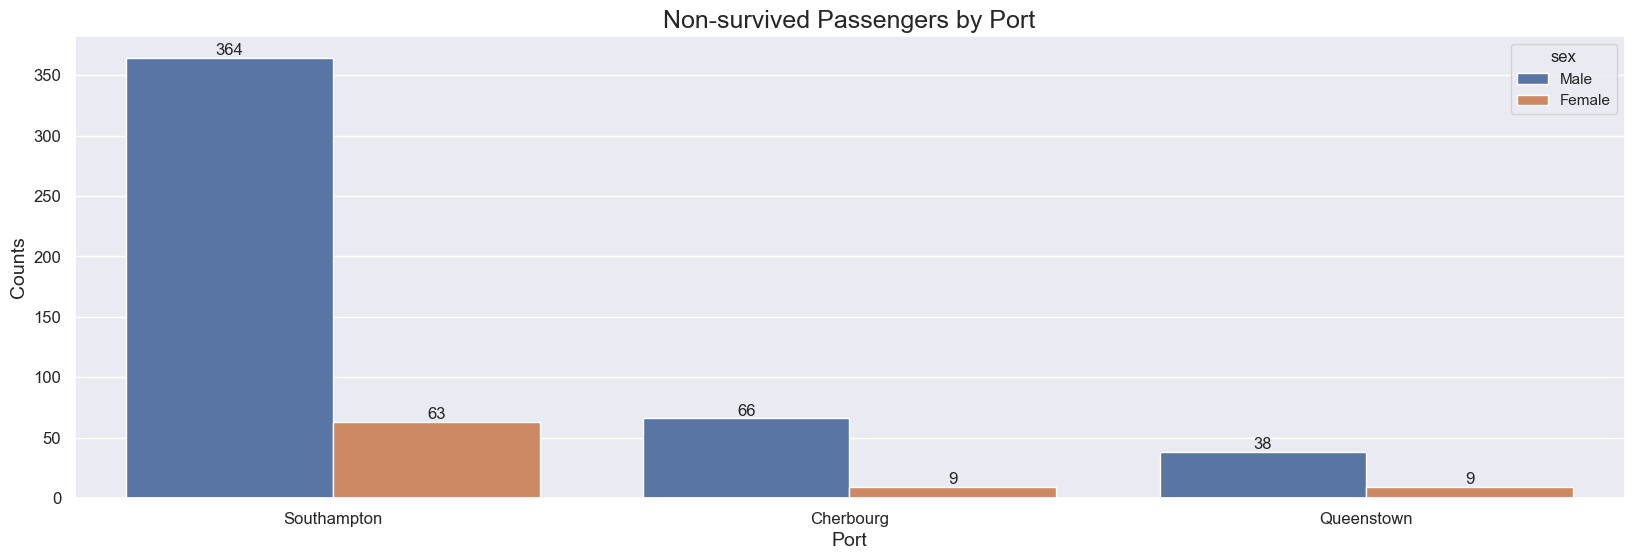

In [42]:
axs10 = sns.countplot(data = not_survived_passengers, x = "embarked_from", hue="sex", hue_order=["Male","Female"], order=orders)

for i in axs10.containers:
    axs10.bar_label(i, fontsize=12)
    
plt.xlabel("Port")
plt.ylabel("Counts")
plt.title("Non-survived Passengers by Port")

plt.show()